In [1]:
%matplotlib inline
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report  
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

In [2]:
data_url = 'undersampled_file.csv'
df = pd.read_csv(data_url)

In [3]:
def model_eval(actual, predicted):
  acc_score = accuracy_score(actual, predicted)
  conf_matrix = confusion_matrix(actual, predicted)
  clas_rep = classification_report(actual, predicted)
  print('Model Accuracy is: ', round(acc_score, 2))
  print(conf_matrix)
  print(clas_rep)

In [4]:
y = df['is_fraud']
X = df.iloc[:, df.columns != 'is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest

In [5]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
preds_rf_test = rf.predict(X_test)
model_eval(y_test, preds_rf_test)

Model Accuracy is:  0.95
[[1485   52]
 [  84 1373]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1537
           1       0.96      0.94      0.95      1457

    accuracy                           0.95      2994
   macro avg       0.95      0.95      0.95      2994
weighted avg       0.95      0.95      0.95      2994



In [6]:
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, preds_rf_test)
rf_roc_auc = auc(rf_fpr, rf_tpr)
print("AUC Score:", rf_roc_auc)

AUC Score: 0.9542575742081952


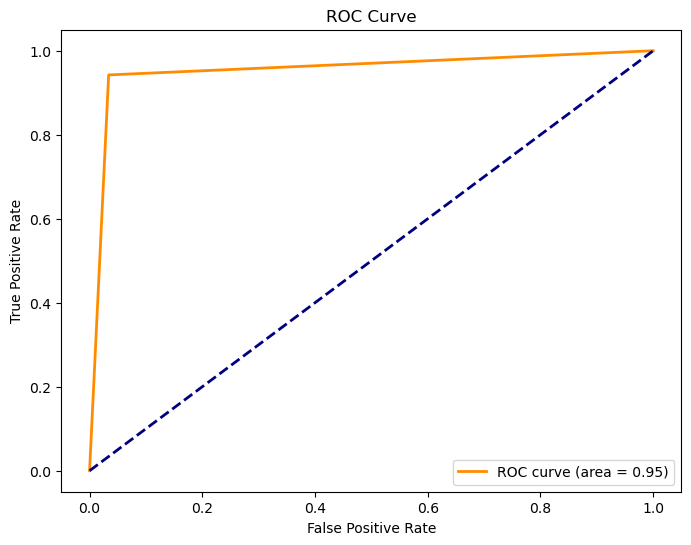

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Neural Network

In [8]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10


C:\Users\lequa\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4958 - loss: 2330.5723 - val_accuracy: 0.4969 - val_loss: 466.3881
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.5064 - loss: 1062.5551 - val_accuracy: 0.5086 - val_loss: 729.4504
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.4992 - loss: 1398.9744 - val_accuracy: 0.5111 - val_loss: 908.6474
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.5118 - loss: 1058.5072 - val_accuracy: 0.4831 - val_loss: 3242.2261
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.5138 - loss: 1100.7996 - val_accuracy: 0.5115 - val_loss: 485.9884
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.5183 - loss: 765.3643 - val_accuracy: 0.5169 - val_loss: 1517.2333
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5048 - loss: 1102.4607 - val_accuracy: 0.5144 - val_loss: 651.0932
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.5

In [9]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int) 
model_eval(y_test, y_pred)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step
Model Accuracy is:  0.52
[[937 600]
 [840 617]]
              precision    recall  f1-score   support

           0       0.53      0.61      0.57      1537
           1       0.51      0.42      0.46      1457

    accuracy                           0.52      2994
   macro avg       0.52      0.52      0.51      2994
weighted avg       0.52      0.52      0.51      2994



In [10]:
nn_fpr, nn_tpr, nn_thresholds = roc_curve(y_test, y_pred_prob)
nn_roc_auc = auc(nn_fpr, nn_tpr)
print("AUC Score:", nn_roc_auc)

AUC Score: 0.5188237164358989


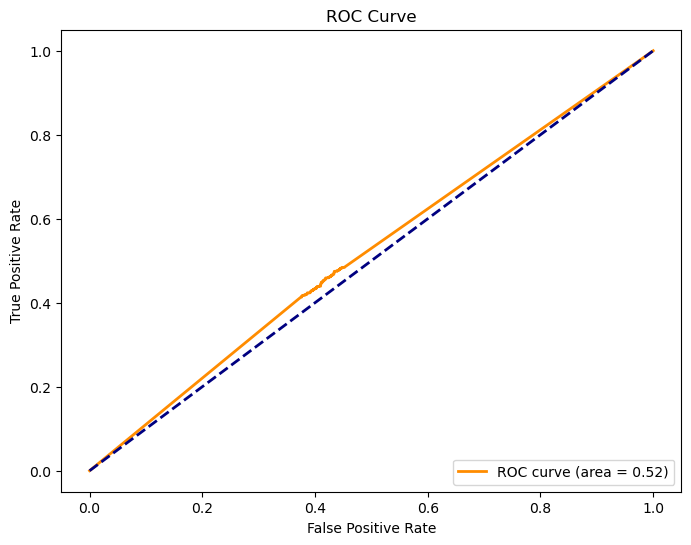

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(nn_fpr, nn_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % nn_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()